### Неомного о context manager

In [15]:
import random


class Logger:
    def __enter__(self):
        print("Start of logging:\n")
        self.value = random.randint(0, 9)
        return self

    def __exit__(self, exc_type, exc_val, exc_tb):
        print(f"\nEnd of logging, {exc_type=}, {exc_val=}, {exc_tb=}")

In [40]:
logger = Logger()
with logger as l:
    print(f"{l.value=}")
    print(f"{1 / l.value=}")

print("Вне контекста")

Start of logging:

l.value=0

End of logging, exc_type=<class 'ZeroDivisionError'>, exc_val=ZeroDivisionError('division by zero'), exc_tb=<traceback object at 0x103a91f80>


ZeroDivisionError: division by zero

### Работа с файлами в Python
open(filename, mode='r')  
filename - имя файла  
mode - модификатор работы с файлом  
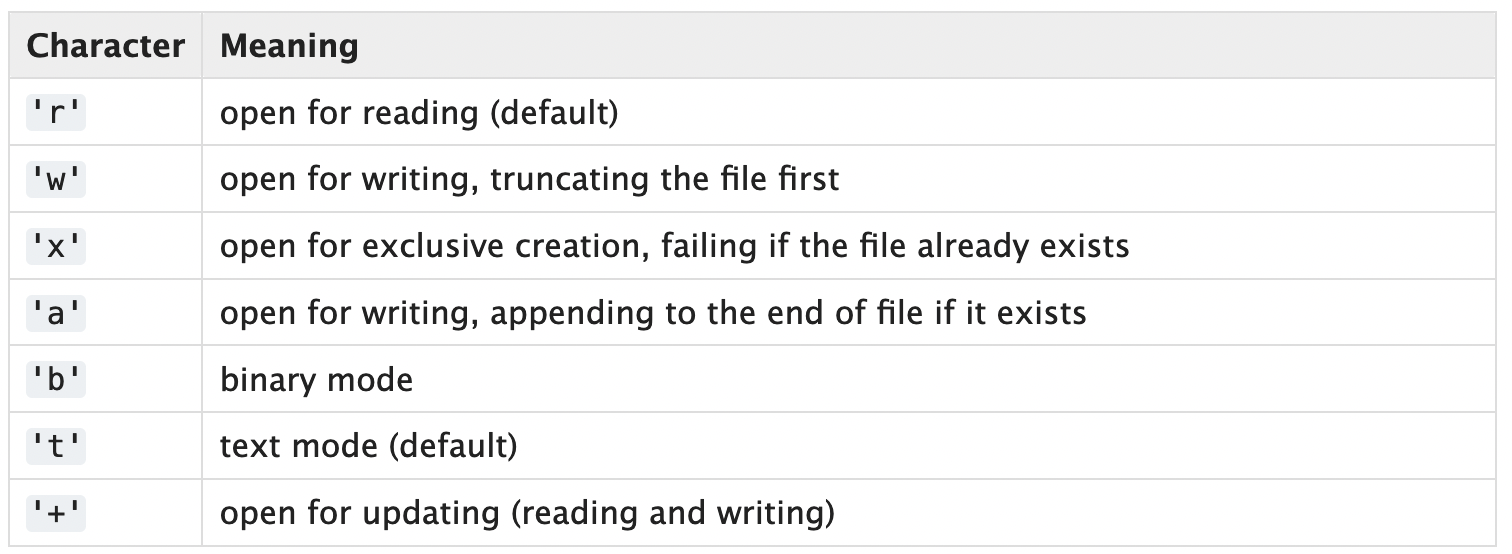

In [43]:
file = open("file.txt", "r")
file.read()

'Hello World!!!\nHello ITAM!\n'

In [44]:
file.close()

In [45]:
file.read()

ValueError: I/O operation on closed file.

In [46]:
# Операции open close можно заменить через контекст менеджер
with open("file.txt", "r") as f:
    print(f.closed)
    print(f.read())
print(f.closed)

False
Hello World!!!
Hello ITAM!

True


### Имплиментации Питона
Язык Питон имеет разные имплиментации(взято с https://www.python.org/download/alternatives/):
- `CPython` - "traditional" implementation of Python writen on C
- `IronPython` - Python running on .NET
- `Jython` - Python running on the Java Virtual Machine
- `PyPy` - A fast python implementation with a JIT compiler
- `Stackless Python` - Branch of CPython supporting microthreads
- `MicroPython` - Python running on micro controllers


### Синхронность, асинхронность, конкурентность, параллелизм
- В ​синхронных операциях задачи выполняются друг за другом. Асинхронные задачи могут запускаться и завершаться независимо друг от друга. 
- Одна асинхронная задача может запускаться и продолжать выполняться, пока начинается выполнение новой задачи. Асинхронные задачи не блокируют (не заставляют ждать завершения выполнения задачи) операции и обычно выполняются в фоновом режиме.


- Конкурентность подразумевает, что две задачи выполняются совместно. 

- Когда же задачи выполняются двумя и более исполнителями, то задачи выполнялись параллельно.

### Треды(потоки) и Процессы
Процесс — экземпляр программы во время выполнения, независимый объект, которому выделены системные ресурсы (например, процессорное время и память). Каждый процесс выполняется в отдельном адресном пространстве: один процесс не может получить доступ к переменным и структурам данных другого. Если процесс хочет получить доступ к чужим ресурсам, необходимо использовать межпроцессное взаимодействие. Это могут быть конвейеры, файлы, каналы связи между компьютерами и многое другое.
<br><br>
Поток использует то же самое пространства стека, что и процесс, а множество потоков совместно используют данные своих состояний. Как правило, каждый поток может работать (читать и писать) с одной и той же областью памяти, в отличие от процессов, которые не могут просто так получить доступ к памяти другого процесса. У каждого потока есть собственные регистры и собственный стек, но другие потоки могут их использовать.
<br><br>
В Питоне также как и в других языках можно использовать треды и процессы.

#### Зачем процессы....
Если задача независима и вся информация ей нужная хранится в ней же, а не в материнском процессе(либо доступна не через него), то эффективнее и безопаснее использовать процессы.  
#### А потоки?
В ситуации, когда нам надо использовать общую память, стоит использовать потоки. Например, при вычисление результата перемножения матриц используются потоки. (разделение большой задачи на маленькие подзадачи)

### IO-bound и CPU-bound задачи
(IO - input/output, CPU - center processing unit)  
Программа является CPU-bound, если она будет быстрее если сам CPU будет быстрее работать, иными словами она тратит большую часть времени на использование CPU. Например, вычисление новых знаков числа π будет задачей CPU-bound.

Программа называется IO-bound, если она будет быстрее если IO подсистема будет быстрее. Какая именно - может варьироваться. "I" в основном ассоциирутеся с диском, нетворком и коммуникациями. Программа, которая просматривает громадное количество файлов становится IO-bound, потому что её узкое место это скорость чтения с диска, а не скорость CPU. 

### GIL
Python Global Interpreter Lock (GIL) — это своеобразная блокировка, позволяющая только одному потоку управлять интерпретатором Python. Это означает, что в любой момент времени будет выполняться только один конкретный поток.

#### Что за проблему в Python решает GIL?

Python подсчитывает количество ссылок для корректного управления памятью. Это означает, что созданные в Python объекты имеют переменную подсчёта ссылок, в которой хранится количество всех ссылок на этот объект. Как только эта переменная становится равной нулю, память, выделенная под этот объект, освобождается.

In [49]:
import sys

a = []
b = a
c = a.copy()
sys.getrefcount(a)

3

Проблема, которую решает GIL, связана с тем, что в многопоточном приложении сразу несколько потоков могут увеличивать или уменьшать значения этого счётчика ссылок. Это может привести к тому, что память очистится неправильно и удалится тот объект, на который ещё существует ссылка.
<br><br>
Счётчик ссылок можно защитить, добавив блокираторы на все структуры данных, которые распространяются по нескольким потокам. В таком случае счётчик будет изменяться исключительно последовательно.
<br><br>
Но добавление блокировки к нескольким объектам может привести к появлению другой проблемы — взаимоблокировки (англ. deadlocks), которая получается только если блокировка есть более чем на одном объекте. К тому же эта проблема тоже снижала бы производительность из-за многократной установки блокираторов.

В связи с этим в питоне мультитрединг всегда будет выполняться на 1 ядре последовательно, за исключением IO-bound инструкций. 